In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import os
import random
import shutil
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools

In [145]:
model = Sequential([
    Conv2D(filters=48, kernel_size=(3, 3), activation='relu',
           padding='same', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=64, activation='relu'),
    Dense(units=4, activation='softmax')
])


In [153]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        'Train',  # this is the target directory
        target_size=(224, 224),  
        batch_size=10,
        class_mode='categorical',
        subset='training')

# this is a similar generator, for validation data
validation_generator = train_datagen.flow_from_directory(
        'Train',
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical',
        subset='validation') 

history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=100,
        validation_data=validation_generator,
        validation_steps=len(validation_generator))


Found 192 images belonging to 4 classes.
Found 48 images belonging to 4 classes.
Epoch 1/100
20/20 [==============================] - 2s 86ms/step - loss: 0.1560 - accuracy: 0.9479 - val_loss: 7.2940 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 1s 68ms/step - loss: 0.2283 - accuracy: 0.9531 - val_loss: 4.9352 - val_accuracy: 0.5833
Epoch 3/100
20/20 [==============================] - 1s 65ms/step - loss: 0.3963 - accuracy: 0.9219 - val_loss: 3.9223 - val_accuracy: 0.5417
Epoch 4/100
20/20 [==============================] - 1s 65ms/step - loss: 0.2374 - accuracy: 0.9375 - val_loss: 6.7532 - val_accuracy: 0.5208
Epoch 5/100
20/20 [==============================] - 1s 67ms/step - loss: 0.0887 - accuracy: 0.9688 - val_loss: 5.5232 - val_accuracy: 0.5417
Epoch 6/100
20/20 [==============================] - 1s 65ms/step - loss: 0.0184 - accuracy: 0.9948 - val_loss: 6.6782 - val_accuracy: 0.6250
Epoch 7/100
20/20 [==============================] - 1s 63ms/step -

In [147]:
len(train_generator)

20

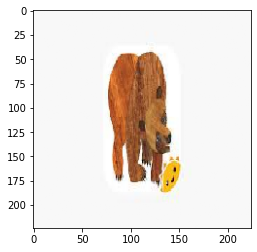

[0. 1. 0. 0.]


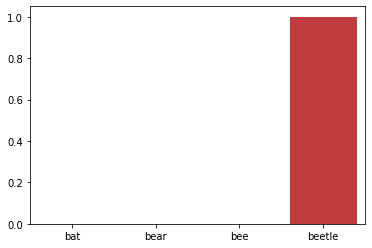

In [169]:
img, label = validation_generator.next()

plt.imshow(img[0] / 255)
plt.show()
print(label[0])

prediction = model.predict(img)

df = pd.DataFrame(prediction, columns=['bat', 'bear', 'bee', 'beetle'])
sns.barplot(data=df.iloc[[0]])
plt.show()


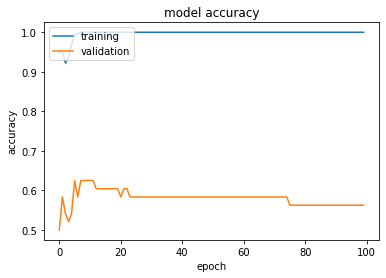

In [154]:
plt.plot(history.history['accuracy'], )
plt.plot(history.history['val_accuracy'], )
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks()
plt.yticks()
plt.legend(['training', 'validation'], loc='upper left',)
plt.show()